## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## Build Training Data Function

This function generates synthetic building data using physics-based simulation:
- **Inputs**: Outdoor temperature, previous indoor temperature, setpoint, occupancy
- **Outputs**: Target temperature and energy consumption

In [3]:
def build_training_data(n_rows: int = 15000):
    """
    Generate building data using physics-based simulation.
    Returns a DataFrame with features and targets.
    """
    np.random.seed(42)

    # Inputs
    outdoor_temp = np.random.normal(15, 8, n_rows)   # Weather
    prev_indoor_temp = np.random.normal(21, 2, n_rows) # Current State
    setpoint = np.random.choice(np.arange(18, 25, 0.5), n_rows) # Action
    occupancy = np.random.choice([0, 1], n_rows, p=[0.4, 0.6]) # Context

    # --- Physics Logic ---
    # 1. Temperature Dynamics (Next Temp)
    # Heat Loss/Gain from outside + HVAC heating/cooling + Body heat
    thermal_drift = 0.05 * (outdoor_temp - prev_indoor_temp)
    hvac_power = 0.3 * (setpoint - prev_indoor_temp)
    body_heat = 0.1 * occupancy

    next_indoor_temp = prev_indoor_temp + thermal_drift + hvac_power + body_heat + np.random.normal(0, 0.1, n_rows)

    # 2. Energy Consumption (kWh)
    # Energy is proportional to the "gap" the HVAC tries to close + baseload
    base_load = 0.5 # Fans, lights
    hvac_kwh = np.abs(hvac_power) * 5 # Factor to convert 'effort' to kWh
    total_energy = base_load + hvac_kwh + (0.2 * occupancy) + np.random.normal(0, 0.05, n_rows)

    df = pd.DataFrame({
        'Outdoor_Temp': outdoor_temp,
        'Prev_Indoor_Temp': prev_indoor_temp,
        'Setpoint': setpoint,
        'Occupancy': occupancy,
        'Target_Temp': next_indoor_temp,   # Target 1
        'Target_Energy': total_energy      # Target 2
    })
    
    return df

print("Function defined successfully!")

Function defined successfully!


## Generate Training Data

Generate 15,000 rows of training data

In [4]:
# Generate the training data
training_df = build_training_data(n_rows=15000)

print(f"Generated {len(training_df)} rows of training data")
print(f"\nDataFrame shape: {training_df.shape}")
print(f"\nColumn names: {list(training_df.columns)}")

Generated 15000 rows of training data

DataFrame shape: (15000, 6)

Column names: ['Outdoor_Temp', 'Prev_Indoor_Temp', 'Setpoint', 'Occupancy', 'Target_Temp', 'Target_Energy']


## Explore the Data

Let's look at the first few rows and basic statistics

In [5]:
# Display first few rows
print("First 10 rows:")
display(training_df.head(10))

First 10 rows:


,Outdoor_Temp,Prev_Indoor_Temp,Setpoint,Occupancy,Target_Temp,Target_Energy
0,18.973713,20.713154,23.5,1,21.514208,4.873340
1,13.893886,20.934688,18.5,1,19.741049,4.309519
2,20.181508,21.128590,23.5,1,21.525198,4.197390
3,27.184239,22.893723,21.0,0,22.576055,3.380162
4,13.126773,19.505565,19.5,0,19.229562,0.526901
5,13.126904,19.307306,21.5,0,19.555029,3.744374
6,27.633703,23.473239,21.0,1,23.020166,4.492868
7,21.139478,20.074711,21.5,1,20.800614,2.907200
8,11.244205,18.473929,19.5,1,18.500294,2.183703
9,19.340480,20.029740,23.0,0,21.007558,4.886289


In [6]:
# Display summary statistics
print("Summary Statistics:")
display(training_df.describe())

Summary Statistics:


,Outdoor_Temp,Prev_Indoor_Temp,Setpoint,Occupancy,Target_Temp,Target_Energy
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,15.016749,20.994393,21.247767,0.607667,20.830452,4.107979
std,8.015082,1.990934,2.000149,0.488287,1.470786,2.513264
min,-16.379202,13.287249,18.000000,0.000000,15.024365,0.351776
25%,9.661232,19.625419,19.500000,0.000000,19.822476,2.073935
50%,15.011779,21.004748,21.000000,1.000000,20.812498,3.675582
75%,20.380956,22.353688,23.000000,1.000000,21.854148,5.662195
max,46.409902,29.958169,24.500000,1.000000,26.369146,16.286314


In [7]:
# Check for missing values
print("Missing values:")
print(training_df.isnull().sum())
print(f"\nTotal missing values: {training_df.isnull().sum().sum()}")

Missing values:
Outdoor_Temp        0
Prev_Indoor_Temp    0
Setpoint            0
Occupancy           0
Target_Temp         0
Target_Energy       0
dtype: int64

Total missing values: 0


## Visualize the Data

Create visualizations to understand the data distributions and relationships

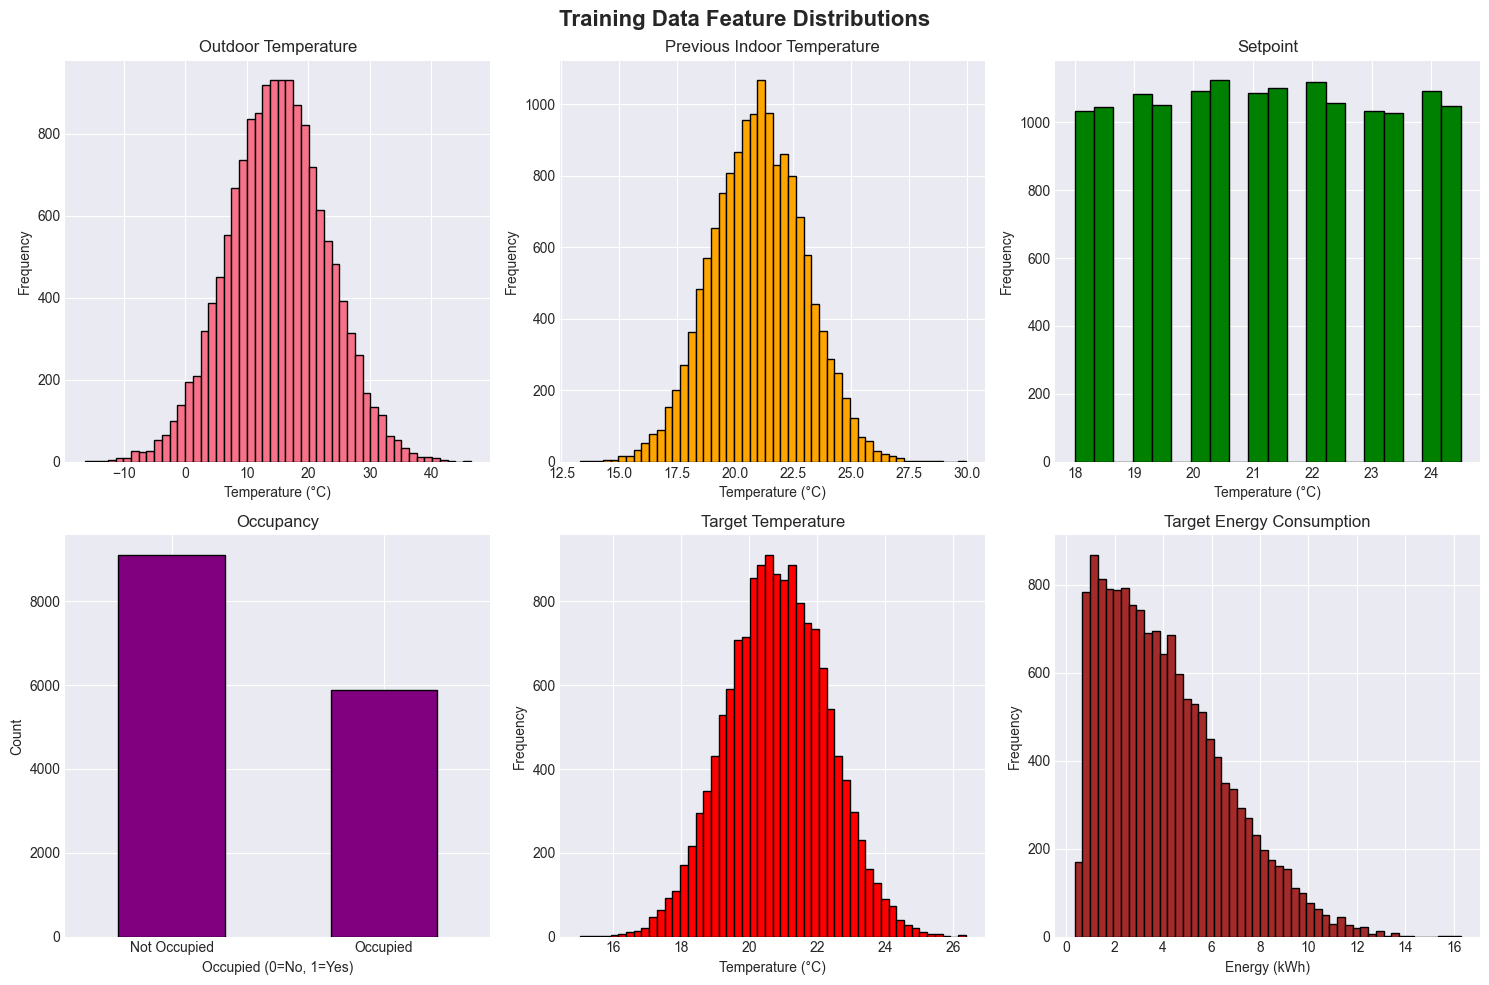

In [8]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create subplots for feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Training Data Feature Distributions', fontsize=16, fontweight='bold')

# Plot each feature
training_df['Outdoor_Temp'].hist(bins=50, ax=axes[0, 0], edgecolor='black')
axes[0, 0].set_title('Outdoor Temperature')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

training_df['Prev_Indoor_Temp'].hist(bins=50, ax=axes[0, 1], edgecolor='black', color='orange')
axes[0, 1].set_title('Previous Indoor Temperature')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

training_df['Setpoint'].hist(bins=20, ax=axes[0, 2], edgecolor='black', color='green')
axes[0, 2].set_title('Setpoint')
axes[0, 2].set_xlabel('Temperature (°C)')
axes[0, 2].set_ylabel('Frequency')

training_df['Occupancy'].value_counts().plot(kind='bar', ax=axes[1, 0], edgecolor='black', color='purple')
axes[1, 0].set_title('Occupancy')
axes[1, 0].set_xlabel('Occupied (0=No, 1=Yes)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['Not Occupied', 'Occupied'], rotation=0)

training_df['Target_Temp'].hist(bins=50, ax=axes[1, 1], edgecolor='black', color='red')
axes[1, 1].set_title('Target Temperature')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Frequency')

training_df['Target_Energy'].hist(bins=50, ax=axes[1, 2], edgecolor='black', color='brown')
axes[1, 2].set_title('Target Energy Consumption')
axes[1, 2].set_xlabel('Energy (kWh)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

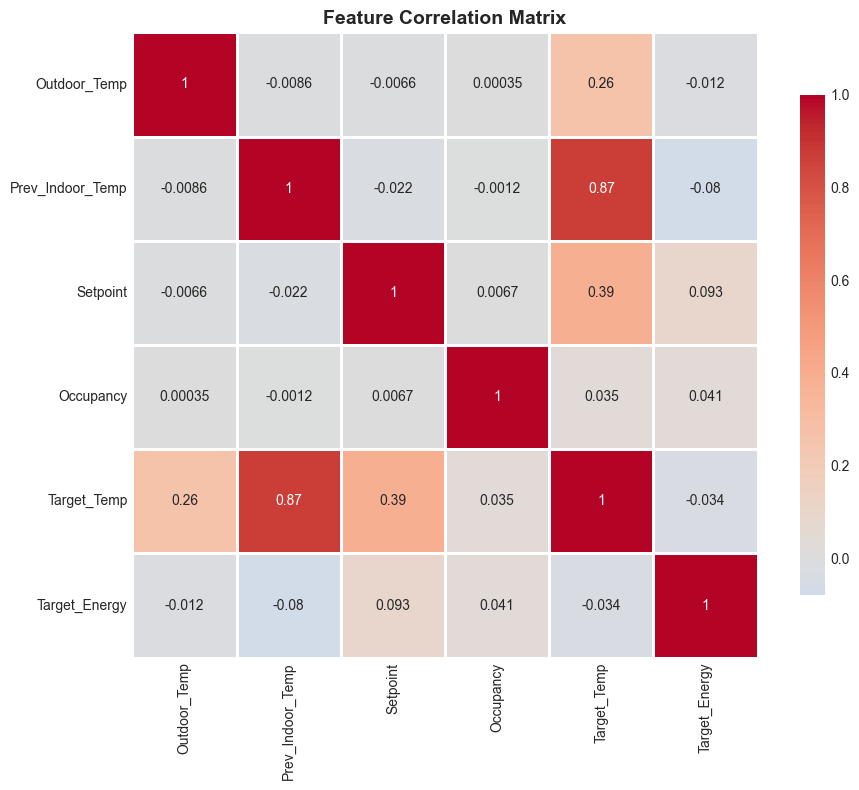

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = training_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

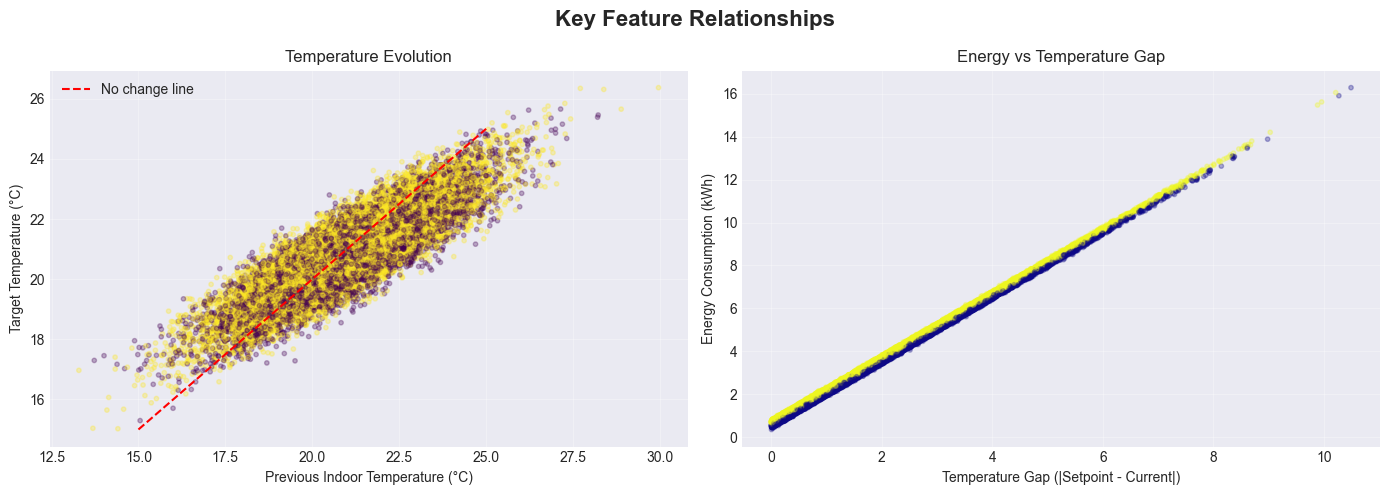

In [10]:
# Scatter plots for key relationships
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Key Feature Relationships', fontsize=16, fontweight='bold')

# Temperature relationship
axes[0].scatter(training_df['Prev_Indoor_Temp'], training_df['Target_Temp'], 
                alpha=0.3, s=10, c=training_df['Occupancy'], cmap='viridis')
axes[0].set_xlabel('Previous Indoor Temperature (°C)')
axes[0].set_ylabel('Target Temperature (°C)')
axes[0].set_title('Temperature Evolution')
axes[0].plot([15, 25], [15, 25], 'r--', label='No change line')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Energy vs setpoint gap
temp_gap = np.abs(training_df['Setpoint'] - training_df['Prev_Indoor_Temp'])
axes[1].scatter(temp_gap, training_df['Target_Energy'], 
                alpha=0.3, s=10, c=training_df['Occupancy'], cmap='plasma')
axes[1].set_xlabel('Temperature Gap (|Setpoint - Current|)')
axes[1].set_ylabel('Energy Consumption (kWh)')
axes[1].set_title('Energy vs Temperature Gap')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Save Training Data to CSV

Export the generated data to a CSV file for use in the main application

In [11]:
# Save to CSV
output_filename = 'training_data.csv'
training_df.to_csv(output_filename, index=False)

print(f"✓ Training data saved to: {output_filename}")
print(f"  - Rows: {len(training_df)}")
print(f"  - Columns: {len(training_df.columns)}")
print(f"  - File size: {training_df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"\nColumns saved: {', '.join(training_df.columns)}")

✓ Training data saved to: training_data.csv
  - Rows: 15000
  - Columns: 6
  - File size: 703.25 KB

Columns saved: Outdoor_Temp, Prev_Indoor_Temp, Setpoint, Occupancy, Target_Temp, Target_Energy


## Verify the Saved File

Load the CSV file to ensure it was saved correctly

In [12]:
# Verify by loading the file
verification_df = pd.read_csv(output_filename)

print("Verification:")
print(f"  - Successfully loaded {len(verification_df)} rows")
print(f"  - Columns match: {list(verification_df.columns) == list(training_df.columns)}")
print(f"  - Data integrity check: {verification_df.equals(training_df)}")
print(f"\nFirst 5 rows from saved file:")
display(verification_df.head())

Verification:
  - Successfully loaded 15000 rows
  - Columns match: True
  - Data integrity check: False

First 5 rows from saved file:


,Outdoor_Temp,Prev_Indoor_Temp,Setpoint,Occupancy,Target_Temp,Target_Energy
0,18.973713,20.713154,23.5,1,21.514208,4.873340
1,13.893886,20.934688,18.5,1,19.741049,4.309519
2,20.181508,21.128590,23.5,1,21.525198,4.197390
3,27.184239,22.893723,21.0,0,22.576055,3.380162
4,13.126773,19.505565,19.5,0,19.229562,0.526901


## Summary

The training data has been successfully generated and saved. Key statistics:
- **Total Samples**: 15,000
- **Features**: Outdoor_Temp, Prev_Indoor_Temp, Setpoint, Occupancy
- **Targets**: Target_Temp, Target_Energy
- **Output File**: training_data.csv

This data can now be imported into the main app.py for model training.